In [17]:
from model.model import *
import time 
import pandas as pd
import matplotlib.pyplot as plt


def run_model(name, CP_loc, N, t, discharge_rate):
    t1 = time.time()
    model = EVSpaceModel(CP_loc=CP_loc,N=N, discharge_rate=discharge_rate)
    model.run_model(t)  
    mdf = model.datacollector.get_model_vars_dataframe()
    adf = model.datacollector.get_agent_vars_dataframe()
    t2 = time.time()
    return t2-t1, mdf, adf, model

CP_loc_init = pd.read_csv('inputs\CP_locs.csv')
num_runs = 20
N = 500
discharge_rate = 0.1
t=50
res = []
for i in range(num_runs):
    CP_loc = CP_loc_init.copy()
    CP_loc['x'] = 5 + (CP_loc_init['x'] - 5) * i/num_runs/0.6
    CP_loc['y'] = 5 + (CP_loc_init['y'] - 5) * i/num_runs/0.6
    t_diff, mdf, adf, model= run_model(name=i, CP_loc=CP_loc,N=N, discharge_rate=discharge_rate, t=t)
    x_dist = sum((CP_loc['x'] - 5)**2 + (CP_loc['y'] - 5)**2)**0.5
    res.append({'name':i,
                't': t_diff,
                'x_dist' : x_dist,
                'trips': mdf.completed_trip.sum()/t/N, 
                'dead_cars': mdf.dead_cars.sum()/t/N,
                'CP_0_x':model.charge_locations['0_Charge'][0]
                })

res_df = pd.DataFrame(res)


C:\Users\gwharf\AppData\Local\Temp\ipykernel_5640\1901172132.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


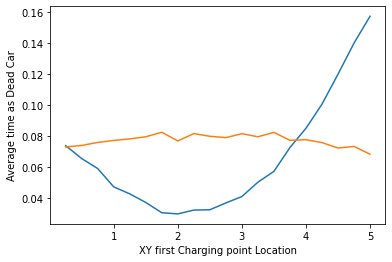

In [22]:
fig, axs = plt.subplots()
axs.plot(res_df['CP_0_x'],res_df['dead_cars'])
axs.plot(res_df['CP_0_x'],res_df['trips'])
axs.set( xlabel='XY first Charging point Location', ylabel='Average time as Dead Car',)
fig.show()

In [20]:
res_df

,name,t,x_dist,trips,dead_cars,CP_0_x
0,0,0.509099,0.000000,0.06848,0.15740,5.00
1,1,0.469062,0.866025,0.07348,0.14008,4.75
2,2,0.448102,1.732051,0.07248,0.12004,4.50
3,3,0.450348,2.598076,0.07596,0.10072,4.25
4,4,0.421128,3.464102,0.07784,0.08520,4.00
5,5,0.417130,4.330127,0.07744,0.07276,3.75
6,6,0.408057,5.196152,0.08256,0.05744,3.50
7,7,0.404933,6.062178,0.07972,0.05044,3.25
8,8,0.410980,6.928203,0.08172,0.04120,3.00
9,9,0.399753,7.794229,0.07916,0.03708,2.75
